In [1]:
import imblearn
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('files_for_lab/customer_churn.csv')
data.columns = [columns_name.lower() for columns_name in data.columns]
data.columns = [columns_name.replace(' ', '_') for columns_name in data.columns]
data

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [4]:
data['totalcharges'] = pd.to_numeric(data['totalcharges'], errors='coerce')

In [5]:
data.isna().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [6]:
data['totalcharges'].fillna(np.median, inplace=True)

In [7]:
data.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
scaler = StandardScaler()

X = data[['tenure', 'seniorcitizen', 'monthlycharges']]
X_scaled = scaler.fit_transform(X)
y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train_scaled, y_train)

predictions = classification.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1035
         Yes       0.63      0.45      0.53       374

    accuracy                           0.78      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [9]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[935 100]
 [204 170]]


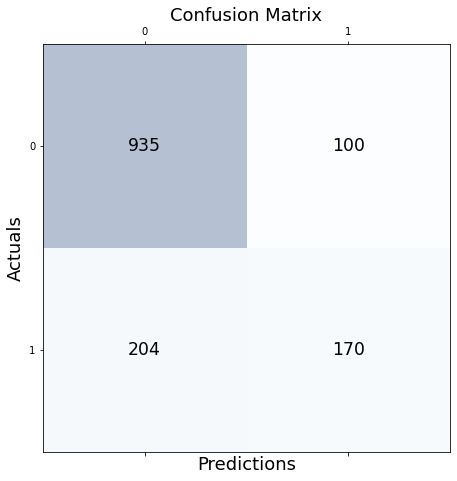

In [10]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

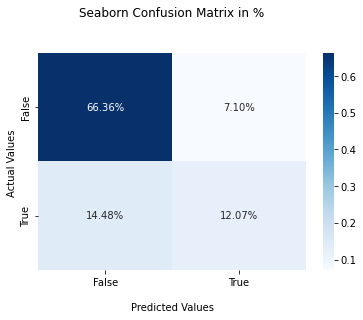

In [11]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix in %\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

# Evaluating the model

Top left: from 1035 values predicted as no, 935 are effectively no - True Negative

Top right: from 1035 values predicted as yes, 100 are effectively no - False Positive

Bottom left: from 374 values predicted as no, 204 are effectively yes - False Negative

Bottom right: from 374 values predicted as yes, 170 are effectively yes - True Positive

# The accuracy of the model, usually calculated as (TP + TN) / (TP + FN + FP + TN) is (170 + 935) / (170 + 204 + 100 + 935) = 1035 / 1409 = 0.73 -> 73%

# Precision: out of the total positive results that are predicted by the model, what is the % of actual positive results (measures how good our model is when the prediction is positive). TP / (TP + FP), that is 170 / (170 + 100) = 0.63 -> 63%

The model also gives the metrics of precision for negative results: out of the total negative results that are predicted by the model, what is the % of actual negative results (measures how good our model is when prediction is negative). TN / (TN + FN), that is 935 / (204 + 935) = 0.82 -> 82%

# Recall: ratio between the number of positive samples correctly classified as positive to the total number of positive samples (measure of how many relevant elements were detected). True Positive Rate = TP / (P -actual positive results- = TP + FN), that is 170 / (170 + 204) = 0.45 -> 45% 

The model also gives metrics of recall for negative results: ratio between the number of negative samples correctly classified as negative to the total number of negative samples (measure of how many relevant elements were detected). True Negative Rate = TN / (N -actual negative results- = TN + FP), that is 935 / (935 + 100) = 0.90 -> 90% 


# f1_score (the harmonic mean of precision and recall) is an evaluation metric that somewhat measures a model's accuracy. It combines the precision and recall scores of a model. The accuracy metric computes how many times a model made a correct prediction across the entire dataset. f1-score is 2 * ((precision * recall) / (precision + recall)), that is 2* ((0.63 * 0.45) / (0.63 + 0.45)) = 0.53 -> 53% (the same for the negative results).

# The closer the f1-score is to 1, the better and more accurate the model will be.

We may be obtaining these results above 70% of accuracy, and better metrics in general for the negative results, because we have class ibalance in our target variable. As we will see below with .value_counts(), we have many more "No" rows than "Yes" rows.

In [12]:
y.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

An imbalanced dataset means instances of one of the two classes is higher than the other, in another way, the number of observations is not the same for all the classes in a classification dataset.

The problem with training the model with an imbalanced dataset is that the model will be biased and favored towards the majority class. This causes a problem when we are interested in the prediction of the minority class or when the information in the dataset from the minority class is more important.

Using value_counts we can get the class-wise count for the target variable/predicted variable.

# Impact of an imbalanced dataset on Logistic Regression.
The Logistic regression principle is to maximize the (yi*w^t*xi) = (yi*(distance from hyperplane)).

For imbalanced datasets the above calculation gives wrong results hence Logistic Regression predicts false values.

In [13]:
# SMOTE (oversamplng technique)

from imblearn.over_sampling import SMOTE

smote = SMOTE()

X = data[['tenure', 'seniorcitizen', 'monthlycharges']]
y = data['churn']

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

No     5174
Yes    5174
Name: churn, dtype: int64

In [14]:
X = data[['tenure', 'seniorcitizen', 'monthlycharges']]
y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Xsm_train, ysm_train = smote.fit_resample(X_train, y_train)

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(Xsm_train, ysm_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.88      0.72      0.79      1035
         Yes       0.48      0.72      0.58       374

    accuracy                           0.72      1409
   macro avg       0.68      0.72      0.68      1409
weighted avg       0.77      0.72      0.73      1409



# SMOTE 

Using SMOTE improved the metrics of f1-score for positive results, precision for negative results, and recall for positive results.

Using SMOTE was worsen the metrics of f1-score for negative results, precision for positive results, and recall for negative results.

Even though the precision score has slightly decreased for the minority class (positive-yes-1), SMOTE has increased the metrics of f1-score and recall for the same minority class, so we can conclude that SMOTE method has increased our classification model performance in this imbalanced dataset.

In [15]:
# Tomek Links (undersampling technique)

from imblearn.under_sampling import TomekLinks

X = data[['tenure', 'seniorcitizen', 'monthlycharges']]
y = data['churn']

tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X, y)
y_tl.value_counts()

No     4712
Yes    1869
Name: churn, dtype: int64

In [16]:
X = data[['tenure', 'seniorcitizen', 'monthlycharges']]
y = data['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Xtl_train, ytl_train = tomek.fit_resample(X, y)

classification = LogisticRegression(random_state=42, max_iter=100000)
classification.fit(Xtl_train, ytl_train)

predictions = classification.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.84      0.87      0.85      1035
         Yes       0.60      0.54      0.57       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



# Tomek Links 

Using Tomek Links technique has improved the metrics of f1-score for positive results, precision for negative results, and recall for positive results.

Using Tomek Links has worsen the metrics of f1-score for negative results, precision for positive results, and recall for negative results.

Even though the precision score has slightly decreased for the minority class (positive-yes-1), Tomek Links has increased the metrics of f1-score and recall for the same minority class, so we can conclude that Tomek Links method has increased our classification model performance in this imbalanced dataset.